In [1]:
%autosave 15
%matplotlib inline


import numpy as np
import scipy as sp
import math
import random
from sklearn.cross_validation import KFold

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Autosaving every 15 seconds


In [2]:
def getGeneticLRegression(test_x, test_y, n, s):
    r = random.uniform        
    a = [0]
    b = [0]
    c = [0]
    for i in range(s):
        ss = 3 / (s - 1);
        a.append(r(ss * i, ss * (i + 1)))
        b.append(r(ss * i, ss * (i + 1)))
        c.append(r(ss * i, ss * (i + 1)))
        
    random.shuffle(a)
    random.shuffle(b)
    random.shuffle(c)
    
    res = [[a[i], b[i], c[i]] for i in range(s)]
    for t in range(n):
        s_res = []
        for a, b, c in res:
            dist = 0
            for i, x in enumerate(test_x):
                area, rooms = x
                y = area * a + rooms * b + c
                dist += (y - test_y[i]) ** 2
            s_res.append([dist, [a, b, c]])             
        s_res.sort()
        res = [x[1] for x in s_res]
        m = len(res) // 2
        best_dudes = res[:m]
        for i in range(m, len(res)):
            dad = random.choice(best_dudes)
            mom = random.choice(best_dudes)
            res[i] = [(dad[i] + mom[i]) / 2 for i in range(3)]
    return res[0]   

In [3]:
fin = open("prices.txt", "r")
line = fin.readline()
data = [list(map(int, line.split(","))) for line in fin.readlines()]
fin.close()
#print(data)

x = [[d[0], d[1]] for d in data]
y = [d[2] for d in data]

max_v = []
ndata = []
for i in range(3):
    t = [d[i] for d in data]
    max_v.append(max(t))
    ndata.append([v / max_v[i] for v in t])
    
nx = [[v] for v in ndata[0]]
for i in range(len(nx)):
    nx[i].append(ndata[1][i])

ny = ndata[2][::]

In [4]:
na, nb, nc = getGeneticLRegression(nx, ny, 6000, 300)
print(na, nb, nc)

0.6122325177711435 0.48741403475604245 0.38277200885879353


In [105]:
a = na * max_v[0]
b = nb * max_v[1]
c = nc * max_v[2]
print(a, b, c)

3867.19243347499 0.48549472300433055 25431.96985432542


In [106]:
nr_y = [(x1 * na + x2 * nb + nc) for x1, x2 in nx]
r_y = [y * max_v[2] for y in nr_y]

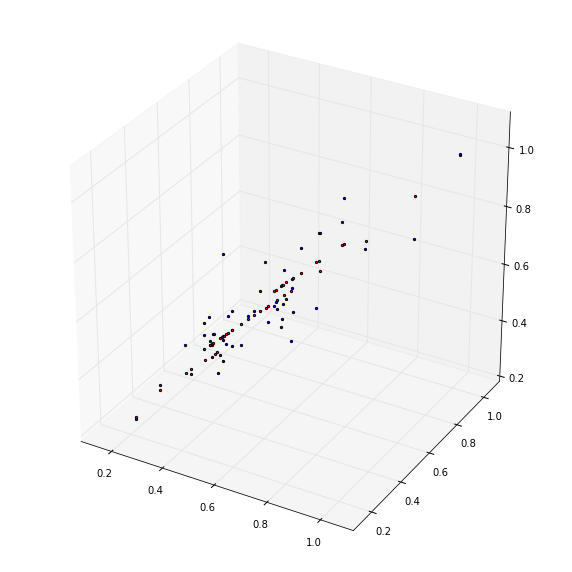

In [107]:
r = 0
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
    
for i in range(len(x)):
    #ax = Axes3D(fig)
    ax.scatter(nx[i][0], nx[i][1], ny[i], c="b", marker=".")
    ax.scatter(nx[i][0], nx[i][1], nr_y[i], c="r", marker=".")
    
plt.show()

In [108]:
err = 0
for i in range(len(y)):
    err += abs(y[i] - r_y[i])
    print(x[i], y[i], r_y[i])
    
print(err / len(x))

[2104, 3] 399900 350201.81124169653
[1600, 3] 329900 282172.8037615594
[2400, 3] 369000 390155.3553173326
[1416, 2] 232000 243744.9066385024
[3000, 4] 539900 484734.1792493917
[1985, 4] 299900 347731.31696300453
[1534, 3] 314900 273264.2432582082
[1427, 3] 198999 258821.5769876235
[1380, 3] 212000 252477.60208372184
[1494, 3] 242500 267865.1156804195
[1940, 4] 239999 341657.2984379923
[2000, 3] 347000 336164.07953944604
[1890, 3] 329999 321316.4787005272
[4478, 5] 699900 697823.853513912
[1268, 3] 259900 237360.04486591357
[2300, 4] 449900 390249.4466380903
[1320, 2] 299900 230787.00045180955
[1236, 3] 199900 233040.7428036827
[2609, 4] 499998 431957.7071765075
[3031, 4] 599000 488918.50312217796
[1767, 3] 252900 304714.1613988271
[1888, 2] 255000 307454.61205640854
[1604, 3] 242900 282712.7165193383
[1962, 4] 259900 344626.81860577606
[3890, 3] 573900 591272.8575899601
[1100, 3] 249900 214683.70903920123
[1458, 3] 464500 263005.9008604097
[2526, 3] 469000 407162.60718736687
[2200, 3] 

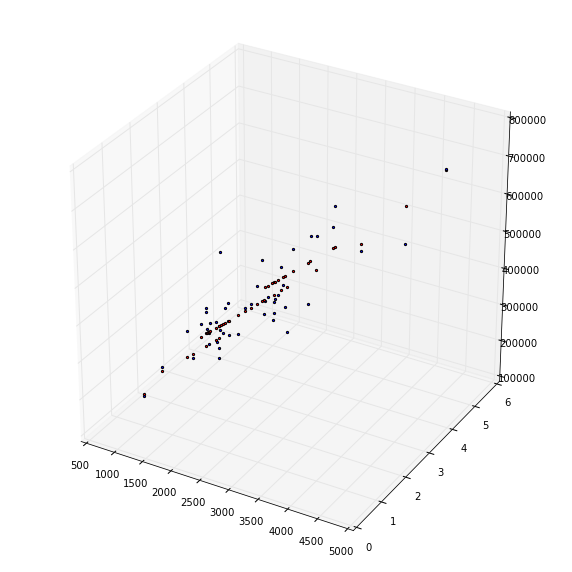

In [109]:
r = 0
fig = plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')
    
for i in range(len(x)):
    
    #ax = Axes3D(fig)
    
    ax.scatter(x[i][0], x[i][1], y[i], c="b", marker=".")
    ax.scatter(x[i][0], x[i][1], r_y[i], c="r", marker=".")
    
plt.show()
    
#plt.show()

In [110]:
x1, x2 = 2200, 3
#2200,3,475000
yy = x1 / max_v[0] * na + x2 / max_v[1] * nb + nc
yy *= max_v[2]
print([x1, x2], yy)

[2200, 3] 363159.71742838935
